# Volumes Finis 1D

Resolution de l'equation -U"(x) = f(x) sur [0,1] avec u(0) = U(1) = 0

## Importation des différentes librairies à utiliser


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate

## Définition de la classe des volumes finis

In [2]:
class FV:
    
    def __init__(self, n, alpha, beta, f):
        self._alpha = alpha
        self._beta = beta
        self._n = n
        self.h = 1/(self._n + 1)
        self._x = np.zeros(n+2)
        for i in range(n+2):
            self._x[i] = i*self.h
        self._x12 = np.zeros(n+1)
        self._x12[0] = self._x[0]
        self._x12[n] = self._x[n+1]
        for i in range(1,n):
            self._x12[i] = (self._x[i] + self._x[i+1])/2
            
        # Remplissage de la matrice B
        self._f = np.zeros(n)
        for i in range(n):
            self._f[i] = integrate.quad(f,self._x12[i],self._x12[i+1])[0]
        self._f[0] = self._f[0] + 2 * self._alpha / self.h
        self._f[n-1] = self._f[n-1] + 2 * self._beta / self.h
        
        
        # Remplissage de la matrice A
        self._A = np.zeros((n,n))
        self._A[0][0] = 3/self.h
        self._A[0][1] = -1/self.h
        self._A[n-1][n-1] = 3/self.h
        self._A[n-1][n-2] = -1/self.h
        for i in range(1,n-1):
            self._A[i][i] = 2/self.h
            self._A[i][i-1] = -1/self.h
            self._A[i][i+1] = -1/self.h
        self._u = np.linalg.solve(self._A,self._f)
    
    def solve(self):
        return self._u
    
    def plot(self):
        x = self._x[1:-1]
        y = self._u
        plt.plot(x,y,"b", label="Approximation of u(x)")
        plt.title("Representation of u(x) on the interval [0;1]")
        plt.show()

In [20]:
# Evaluation de l'erreur entre u exacte et u approché

def erreur(u_exacte, u_approche, n):
    
    erreur=[]
    
    for i in range(n):
        if (u_exacte[i] == 0.0):
            erreur.append(abs(u_exacte[i] - u_approche[i]))
        else:
            erreur.append(abs((u_exacte[i]-u_approche[i])/u_exacte[i]))
    return erreur


In [21]:
# Representation U exacte et U approché
def trace (U, FV):
    x = fv._x[1:-1]
    y_appro = fv.solve()
    y_real = []

    for i in x:
        y_real.append(U(i))

    err = []

    err = erreur(y_real,y_appro,n)

    #Représentation de U approchée et U réel sur un même graphe 

    plt.plot(x,y_appro,"b", label="Approximation de u(x)")
    plt.plot(x,y_real,"r", label="Valeur exacte de u(x)")
    plt.legend()
    plt.title("Representation de u(x) sur l'interval [0;1]")
    plt.savefig("volumes_finis_1_d_u(x).jpg")
    plt.show()
    plt.plot(x, err, label="error")
    plt.legend()
    plt.title("Erreur sur l'approximation de U(X)")
    plt.savefig("volumes_finis_1_d_erreur.jpg")
    plt.show()

    print(" error:", abs((np.linalg.norm(y_real)-np.linalg.norm(y_appro))/np.linalg.norm(y_real)))

In [40]:
# Representation de l'erreur en fonction de n
def trace_error(U,FV):
    err_plot = []
    for i in range (9, 1000):
        fv_conv = FV(i, U(0), U(1), f)
        x = fv_conv._x[1:-1]
        y_appro = fv_conv.solve()
        y_real = []
        for k in x:
            y_real.append(U(k))

        err_plot.append( abs((np.linalg.norm(y_real)-np.linalg.norm(y_appro))/np.linalg.norm(y_real)) )

    plt.plot(range (10, 1001), err_plot, label="error")
    absc = range(10,1001)
    plt.legend()
    plt.title("VARIATION DE L'ERREUR AVEC LE NOMBRE DE MAILLE N")
    plt.show()
    print("Vitesse de convergence")
    print(np.polyfit(np.log(absc), np.log(err_plot), 1)[0])

### cas où U=1

In [29]:

def U(x):
    return x**3
def f(x):
    return -6*x

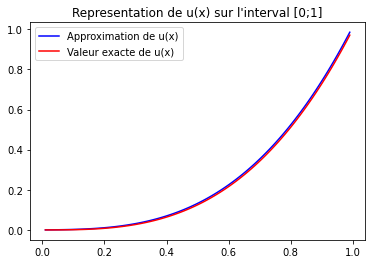

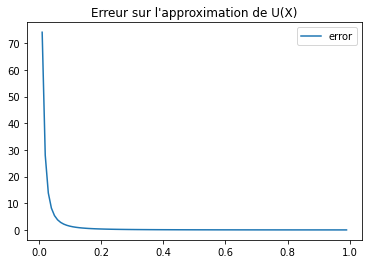

 error: 0.020702175776921156


In [41]:
n = 100
fv = FV(n, U(0), U(1),f)
trace(U,FV)

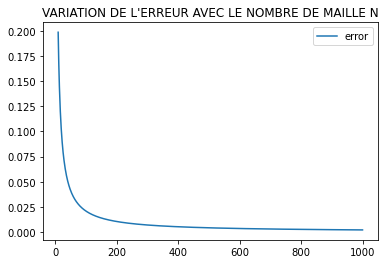

Vitesse de convergence
-0.9960581224569551


In [42]:
trace_error(U,FV)

### Cas où U=x

In [12]:

def U(x):
    return x
def f(x):
    return 0

In [13]:
n = 5
fv = FV(n, U(0), U(1),f)

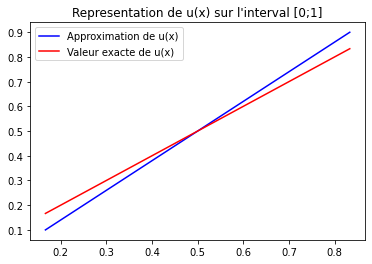

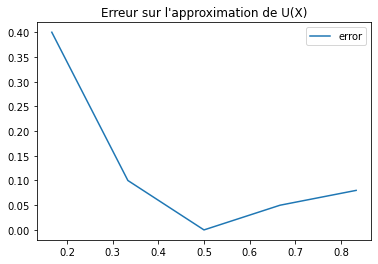

 error: 0.03923048454132667


In [14]:
trace(U,FV)


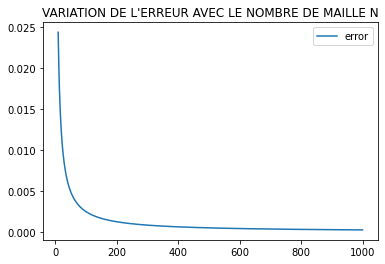

Vitesse de convergence
-0.9985739680577966


In [15]:
trace_error(U,FV)

In [16]:
### Cas où U=

In [17]:
def U(x):
    return x**2
def f(x):
    return -2

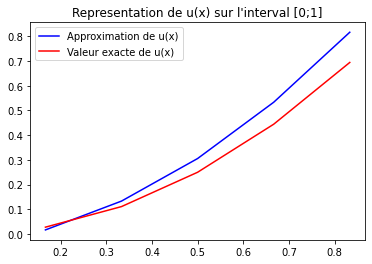

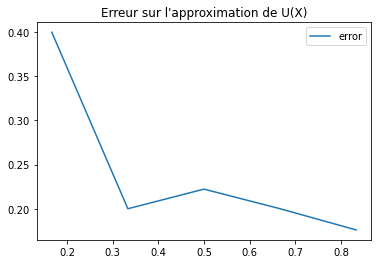

 error: 0.1861474879312602


In [18]:
n = 5
fv = FV(n, U(0), U(1),f)
trace(U,FV)

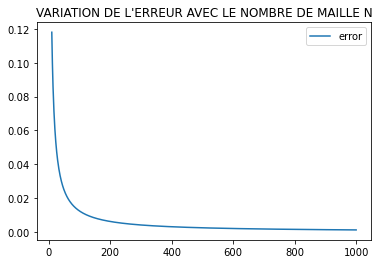

Vitesse de convergence
-0.9958347465228101


In [19]:
trace_error(U,FV)